# Time Series Forecasting of Stock Market Data with ARIMA/SARIMA(X) in Python


Author: Muhammad Nauman Sair\
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/linkedin.svg" width="50" height="50">](https://www.linkedin.com/in/muhammad-nauman-sair/)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/github.svg" width="50" height="50">](https://github.com/mnsair)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/twitter.svg" width="50" height="50">](https://twitter.com/NaumanSair)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/kaggle.svg" width="50" height="50">](https://www.kaggle.com/muhammadnaumansair)


# 1. Time Series Data
`Time series` data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include stock prices, temperature readings, website traffic, and sales data. Time series data can be analyzed using various statistical and machine learning techniques, such as regression analysis, ARIMA models, and deep learning models.

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

`Overall,` time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences.

- `Time series` data is a sequence of data points collected over time that can be used to analyze trends and patterns. It can be collected from various sources and analyzed using statistical and machine learning techniques. 
- `Time series forecasting` is the process of predicting future values based on past observations. Time series data is used in many different fields, including finance, economics, engineering, and social sciences.

# Stock Market Data scraping in Python

In [20]:
# imporot libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from datetime import datetime, timedelta

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [21]:
date.today()

datetime.date(2024, 2, 4)

In [22]:
# define the dates to fetch data
today = date.today()
# Calculate the end date as the current date plus one day, this is to ensure that we get data for the current day too.
end_date = (datetime.now() + timedelta(days=1)).strftime("%Y-%m-%d")
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date, end_date)

Your data will be between these dates:  2023-02-04 2024-02-05


In [28]:
# deifne the ticker
ticker = 'SPY'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-29,487.730011,491.420013,487.170013,491.269989,491.269989,61322800
2024-01-30,490.559998,491.619995,490.109985,490.890015,490.890015,58618400
2024-01-31,488.619995,489.079987,482.859985,482.880005,482.880005,126011100
2024-02-01,484.630005,489.230011,483.799988,489.200012,489.200012,91891600
2024-02-02,489.649994,496.049988,489.299988,494.350006,494.350006,99147700


In [33]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)
#Run this command once, else it will add date comlumn again and again as per your runs

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


In [35]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,250,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2023-08-04 21:01:26.400000,434.737040,436.918281,432.673320,434.986121,431.859700,8.199737e+07
min,2023-02-06 00:00:00,381.809998,389.489990,380.649994,385.359985,379.590729,2.973740e+07
25%,2023-05-05 18:00:00,412.517509,414.577507,410.247490,412.834991,408.260803,6.661758e+07
50%,2023-08-05 12:00:00,435.555008,437.334991,433.580002,436.230011,433.050552,7.858575e+07
75%,2023-11-01 18:00:00,451.419998,453.632507,449.957489,451.145004,448.681328,9.322245e+07
max,2024-02-02 00:00:00,490.559998,496.049988,490.109985,494.350006,494.350006,1.892530e+08
std,NaN,25.141328,24.949961,25.463189,25.294157,26.784070,2.202081e+07


In [36]:
# make a plot on plotly
fig = px.line(df, x='Date', y=df.columns, title='Stock Price')
fig.show()

In [37]:
# select columns
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2023-02-06,409.829987
1,2023-02-07,415.190002
2,2023-02-08,410.649994
3,2023-02-09,407.089996
4,2023-02-10,408.040009


In [38]:
# plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y='Close', title='SPY Stock Price')
fig.show()

#

In [39]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: 0.005156
p-value: 0.958956
Fail to reject the null hypothesis. Data is not stationary


# Lets find `d` Value
 - d is the degree of differencing
  

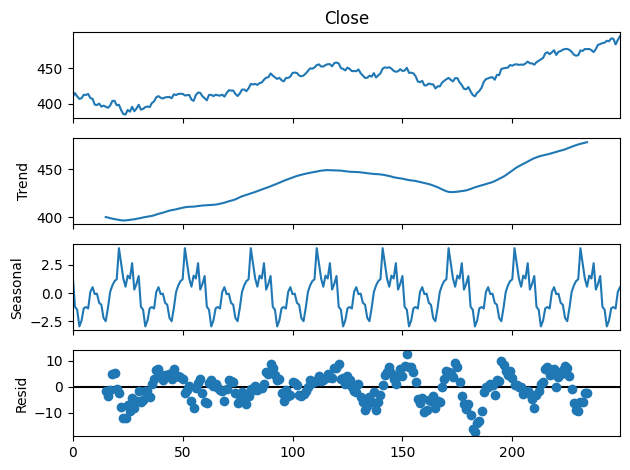

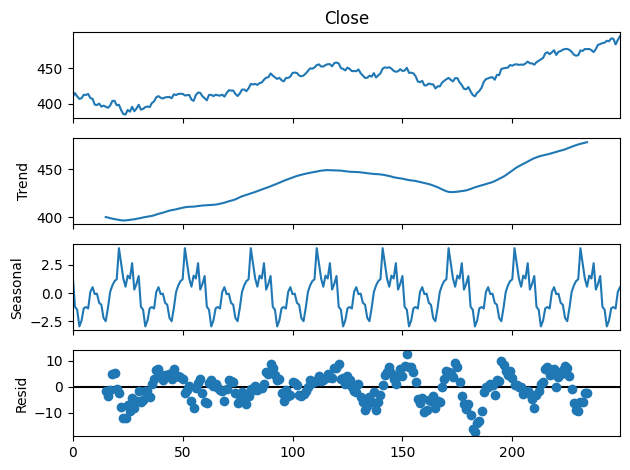

In [40]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

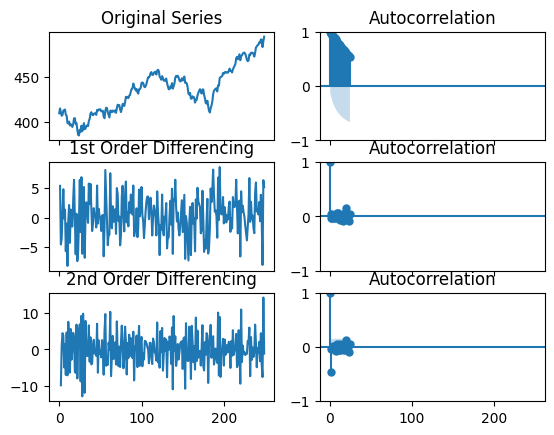

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

`d = 1`

# Lets find `p` value
`p` value should be less than 0.05 for both acf and pacf
  - p is the order of the autoregressive model


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

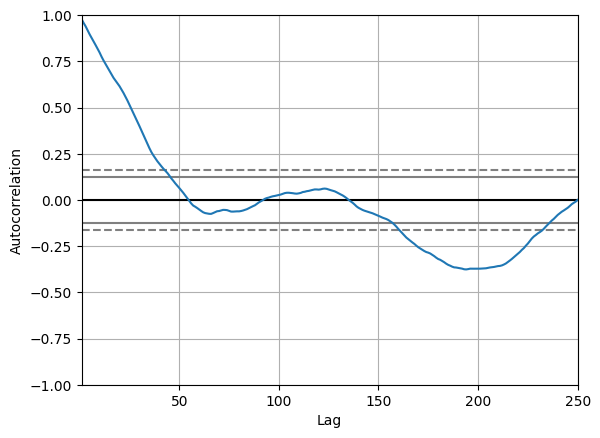

In [44]:
# autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Close'])

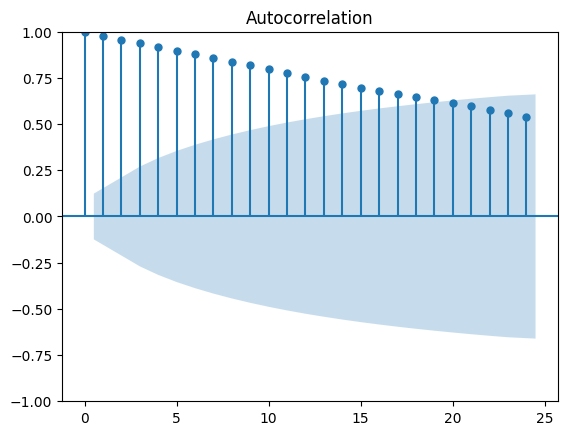

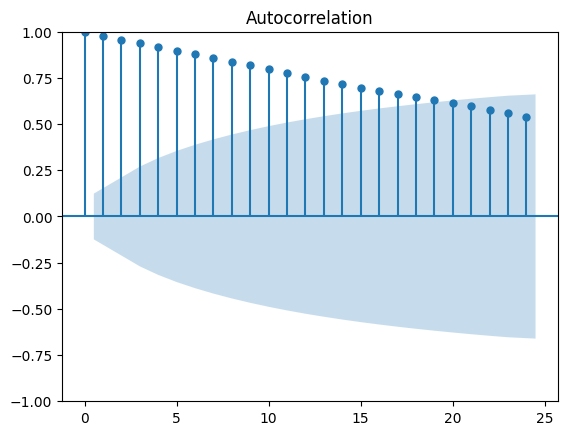

In [45]:
plot_acf(df['Close'], alpha=0.05)

In [46]:
# autocorrelation - easiest way to check 
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.977796
2   0.957411
3   0.939172
4   0.917636
5   0.896104
6   0.877063
7   0.857276
8   0.838000
9   0.818338
10  0.797788
11  0.774853
12  0.754244
13  0.735322
14  0.715810
15  0.696402
16  0.678026
17  0.660651
18  0.645608
19  0.630043
20  0.615543
21  0.597375
22  0.578879
23  0.558528


`p = 3`

# Lets find `q` value
- q is the order of the moving average model\
q is the number of lags to include in the partial correlation, in the chat we have 2 lags.


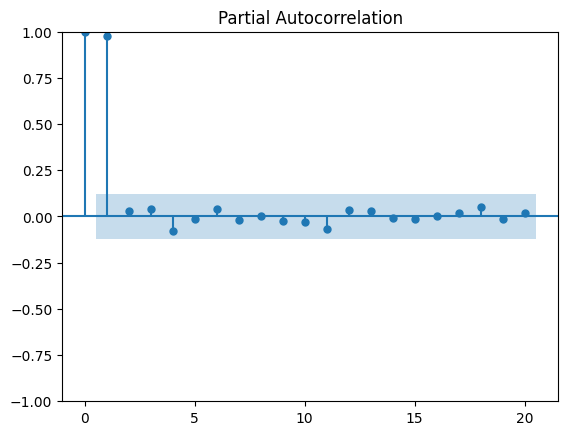

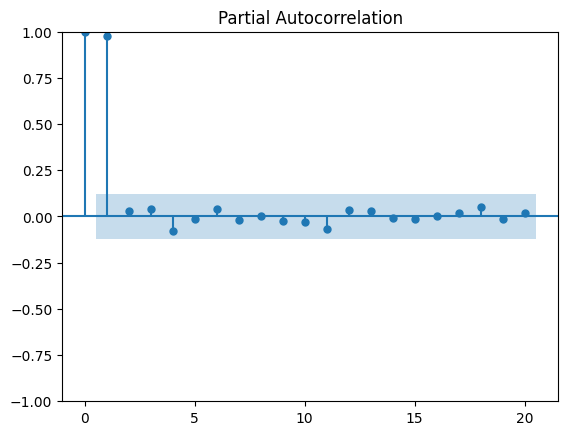

In [47]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

In [48]:
# lets define p, d, q
p = 2
d = 1
q = 2

## Fit the Models

In [49]:
#Model 1: to calculate the best parameters and STD error. if the error is less, it will be the best model

# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1413.947, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1342.947, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1413.463, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1335.376, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.55 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1334.197, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1341.901, Time=0.05 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1335.323, Time=0.20 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1337.224, Time=0.36 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1335.7

In [50]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  250
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -664.098
Date:                            Mon, 05 Feb 2024   AIC                           1334.197
Time:                                    10:16:50   BIC                           1344.601
Sample:                                         0   HQIC                          1338.390
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6448      0.069     -9.314      0.000      -0.780      -0.509
ar.S.L24      -0.2150      0.072   

In [51]:
#Model 2 to calculate the best parameters and STD error. if the error is less, it will be the best model
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -658.489
Date:                Mon, 05 Feb 2024   AIC                           1320.978
Time:                        13:35:44   BIC                           1328.013
Sample:                             0   HQIC                          1323.809
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3394      0.217      1.565      0.117      -0.086       0.764
sigma2        11.6021      1.103     10.519      0.000       9.440      13.764
Ljung-Box (L1) (Q):                   0.48   Jarque-

`Model 2` has higher `STD Error` as Compare to `Model 1`, so **`Model 1`** is best.

## ARIMA with calculated `p`, `d`, `q`

c:\Users\nauma\miniconda3\envs\remotatask\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



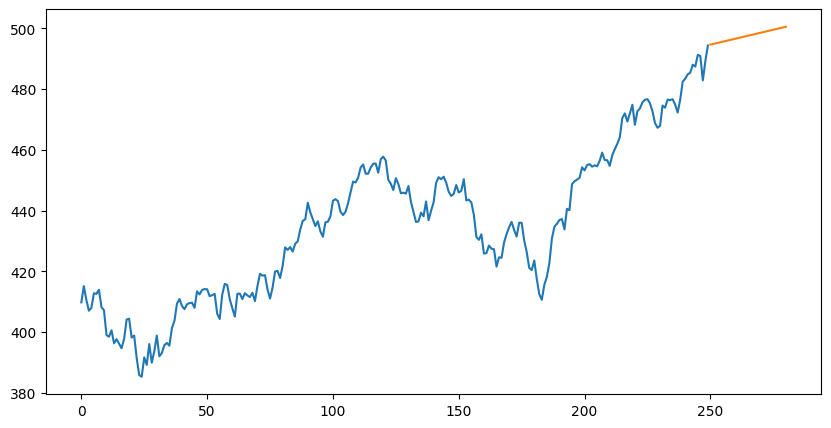

In [52]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA #This is just for test purposes as ARIMA is ignoring seasonality. We will use SARIMA instead.
p, d, q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
# print(model.summary())

# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30) #len is the starting point and 30 is the number of days to predict
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

**Conclusion:** As per above analysis `ARIMA` is not a good fit for Stock data as stock has seasonality in it. It still forcasting the prices but with `higher standard error` it will not be accepted.

## SARIMA with calculated `p`, `d`, `q`

SARIMA (Seasonal AutoRegressive Integrated Moving Average) and SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables) are models used for time series forecasting. Both are extensions of the ARIMA model (AutoRegressive Integrated Moving Average), and they include seasonality components.

### SARIMA (Seasonal ARIMA):

1. **SARIMA Model Components:**
   - **AR (AutoRegressive):** Lagged observations from the same time series.
   - **I (Integrated):** Differencing to make the time series stationary.
   - **MA (Moving Average):** Lagged forecast errors.

2. **Seasonal Components:**
   - Seasonal AR (SAR): Lagged observations from the same time series at seasonal intervals.
   - Seasonal I (SI): Seasonal differencing.
   - Seasonal MA (SMA): Lagged forecast errors at seasonal intervals.

3. **Usage:**
   - SARIMA is suitable for time series data with a clear seasonal pattern.

### SARIMAX (Seasonal ARIMA with eXogenous variables):

1. **SARIMAX Model Components:**
   - All components of SARIMA.
   - **eXogenous Variables (X):** External variables that are not part of the time series but can influence it.

2. **Seasonal Components:**
   - Similar to SARIMA.

3. **Usage:**
   - SARIMAX is suitable when there are external factors (exogenous variables) that may impact the time series.

### Key Differences:

1. **Inclusion of Exogenous Variables:**
   - SARIMA does not include external variables.
   - SARIMAX allows the inclusion of exogenous variables.

2. **Use Cases:**
   - SARIMA is appropriate when the time series itself exhibits a clear seasonal pattern.
   - SARIMAX is used when external factors, not present in the time series, might influence its behavior.

3. **Flexibility:**
   - SARIMA focuses solely on the time series.
   - SARIMAX provides more flexibility by considering external factors.

4. **Model Complexity:**
   - SARIMA is simpler as it deals only with the time series.
   - SARIMAX is more complex due to the inclusion of exogenous variables.

Choose SARIMA when you believe the seasonal pattern is inherent to the time series, and go for SARIMAX when external factors are likely to impact the series. The choice depends on the specific characteristics of your data and the factors influencing it.

In [54]:
# let's run SARIMA as data is seasonal
# if exogenous variables are included (True), SARIMAX is used, otherwise, SARIMA is used (exogenous = False)
import statsmodels.api as sm
import warnings

p , d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'],
                                   
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12)) # 12 is the number of months in a year
model = model.fit()
print(model.summary())

c:\Users\nauma\miniconda3\envs\remotatask\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -639.998
Date:                            Tue, 06 Feb 2024   AIC                           1297.996
Time:                                    00:54:04   BIC                           1329.208
Sample:                                         0   HQIC                          1310.577
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1093      0.027    -40.630      0.000      -1.163      -1.056
ar.L2         -0.9695      0.026   

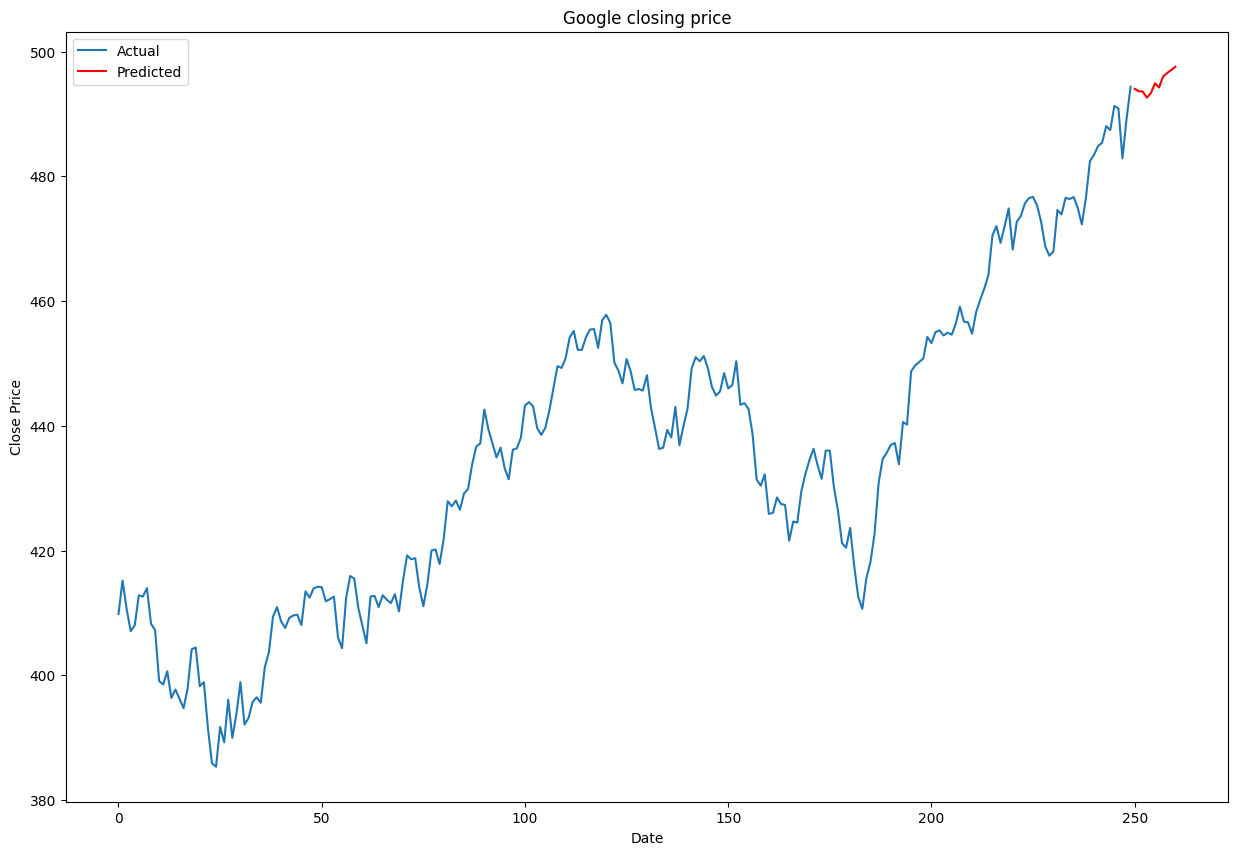

In [56]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10) # 10 is the number of days to forecast, less number will give good results.

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SPY closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


c:\Users\nauma\miniconda3\envs\remotatask\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



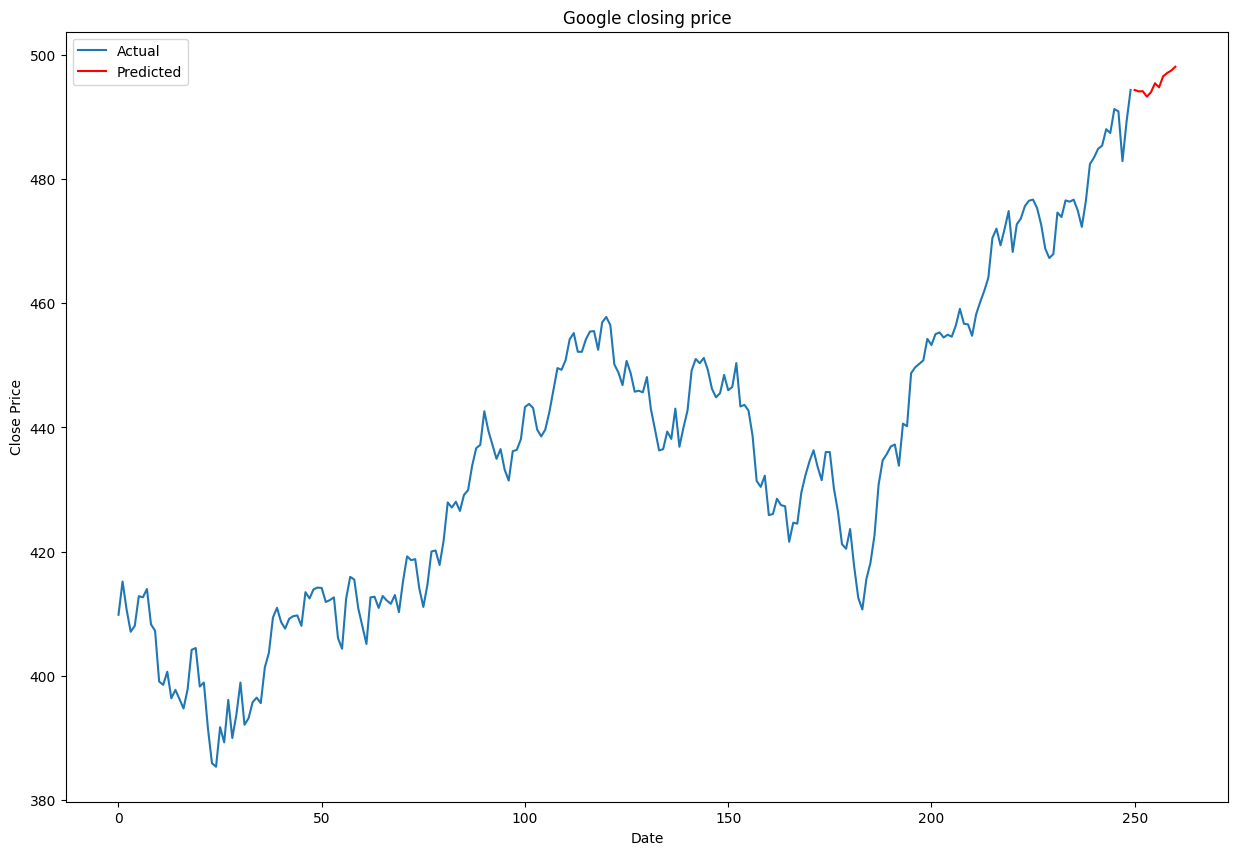

In [57]:
# lets update p, d, q to 3, 1, 2. This will give us more predictions but it will be less accurate
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 3, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SPY closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

# Hyper Paramter Tuning
Not suggested to use because of time taking and less accurate p,d,q values.

In [60]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Assume you have a DataFrame 'df' with your time series data in a column named 'value'
# Assume that the seasonal period of your time series data is 12 (e.g., monthly data)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and m quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(df['Close'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMA{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

# predict next 30 days
model = SARIMAX(df['Close'],
                order = best_pdq,
                seasonal_order = best_seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)
model = model.fit()
predictions = model.predict(len(df['Close']), len(df['Close'])+10)



c:\Users\nauma\miniconda3\envs\remotatask\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\nauma\miniconda3\envs\remotatask\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\nauma\miniconda3\envs\remotatask\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\nauma\miniconda3\envs\remotatask\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\nauma\miniconda3\envs\remotatask\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\nauma\miniconda3\envs\remotatask\lib\site-packages\statsmodels\base\model.py

Best SARIMA(0, 1, 1)x(1, 1, 1, 12)12 model - AIC:1211.141637334812


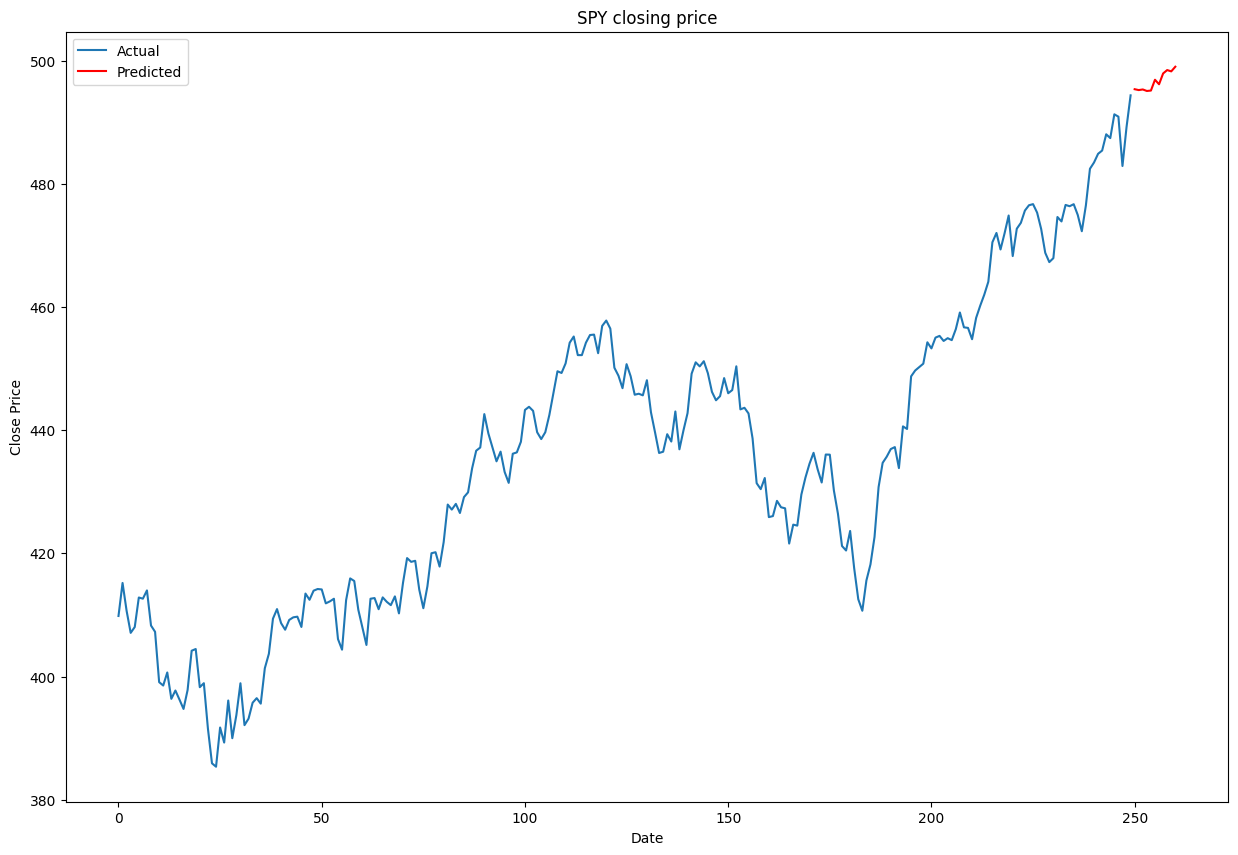

In [61]:
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SPY closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

In [64]:
# print the pridicted values for next 10 days with dates
#Print the predictions top few values
print("Predicted first 10 values:")
print(predictions[0:10])

Predicted first 10 values:
250    495.346531
251    495.204294
252    495.305487
253    495.059875
254    495.127714
255    496.881393
256    496.148397
257    497.905083
258    498.453445
259    498.242327
Name: predicted_mean, dtype: float64


In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -601.571
Date:                            Tue, 06 Feb 2024   AIC                           1211.142
Time:                                    01:06:43   BIC                           1224.770
Sample:                                         0   HQIC                          1216.643
                                            - 250                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0961      0.074      1.294      0.196      -0.049       0.242
ar.S.L12      -0.0124      0.017     -0.721      0.471      -0.046       0.021
ma.S.L12      -1.0000    251.558     -0.004      0.997    -494.045     492.045
sigma2        11.1161   2796.546      0.004      0.997   -5470.014    5492.246
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.98   Prob(JB):                         1.00
Heteroskedasticity (H):               0.89   Skew:                            -0.01
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""